## Homework 5

In [18]:
import numpy as np
import pandas as pd
from sklearn import gaussian_process
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('default')

**Load the national COVID dataset and solve the exercise using `scikit-learn` library.**

In [19]:
data = pd.read_csv("homework_05_COVID_national_20200421.csv", index_col=0, usecols=range(1,10))
# convert index to datetime64 data type
data.index = pd.to_datetime(data.index)
data.head()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined
date,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94
2020-02-25,10,8623,35,114,93,322,1,162
2020-02-26,12,9587,36,128,78,400,3,221
2020-02-27,17,12014,56,248,250,650,45,284
2020-02-28,21,15695,64,345,238,888,46,412


In [20]:
def calculate_daily(column):
    """This function calculates adn returns daily values from cumulative column """
    
    cumulative = data[column].values
    daily = np.array([(cumulative[i+1]-cumulative[i]) for i in range(len(data[column])-1)])
    daily = np.insert(daily,0,cumulative[0])
    return daily

daily_swabs = calculate_daily("swabs")
daily_deaths = calculate_daily("deaths")

In [21]:
def plot_wdate(column, array=None, label=None):
    
    """ 
    This function plot date and given column name from data 
    with the blue vertical line from 2020-04-15 with specified label or given array.
    You can use this function either giving array or column name of
    dataframe, please ensure that you give None for other option, as default
    array is none.
    """
    
    if column != None:
        plt.figure(figsize=(10,7))
        plt.title("Number of "+label+" with Date")
        plt.xlabel("Date")
        plt.ylabel("Number of "+label)
        plt.plot(data.index,data[column])
        plt.axvline(pd.to_datetime("2020-04-15"), linestyle='--', color='g')
    else:
        plt.figure(figsize=(10,7))
        plt.title("Number of "+label+" with Date")
        plt.xlabel("Date")
        plt.ylabel("Number of"+label)
        plt.plot(data.index,array)
        plt.axvline(pd.to_datetime("2020-04-15"), linestyle='--', color='g')

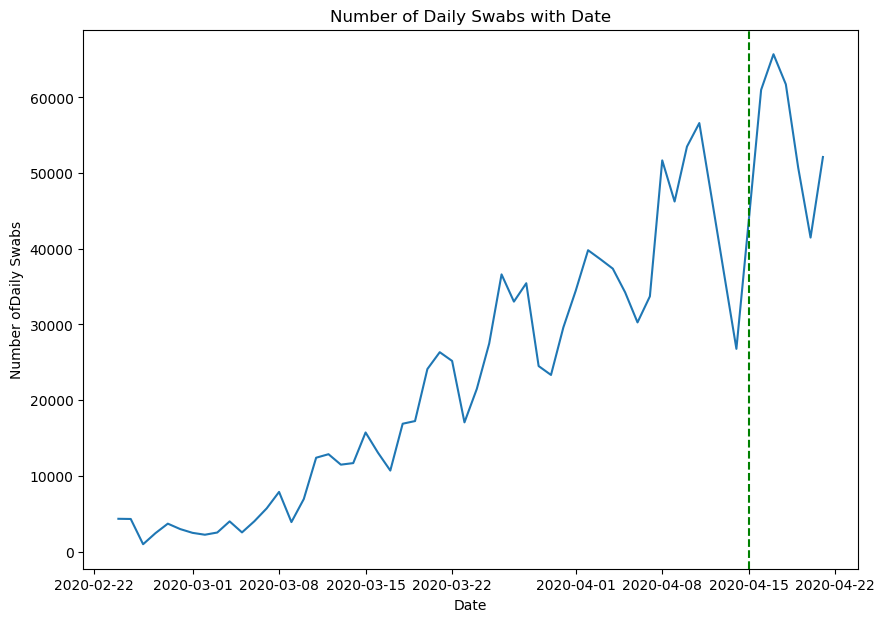

In [22]:
plot_wdate(column=None, array=daily_swabs, label = "Daily Swabs")

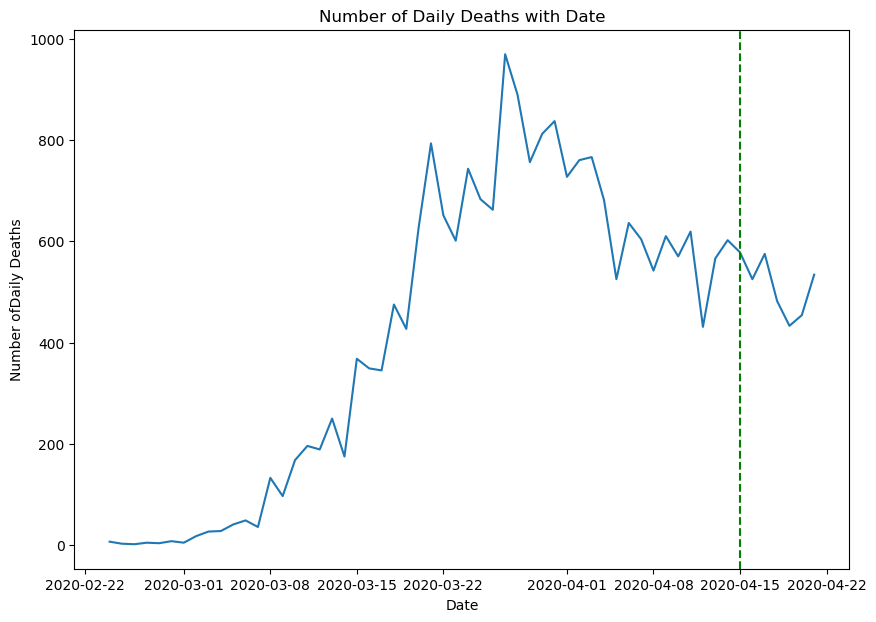

In [23]:
plot_wdate(column=None, array=daily_deaths, label = "Daily Deaths")

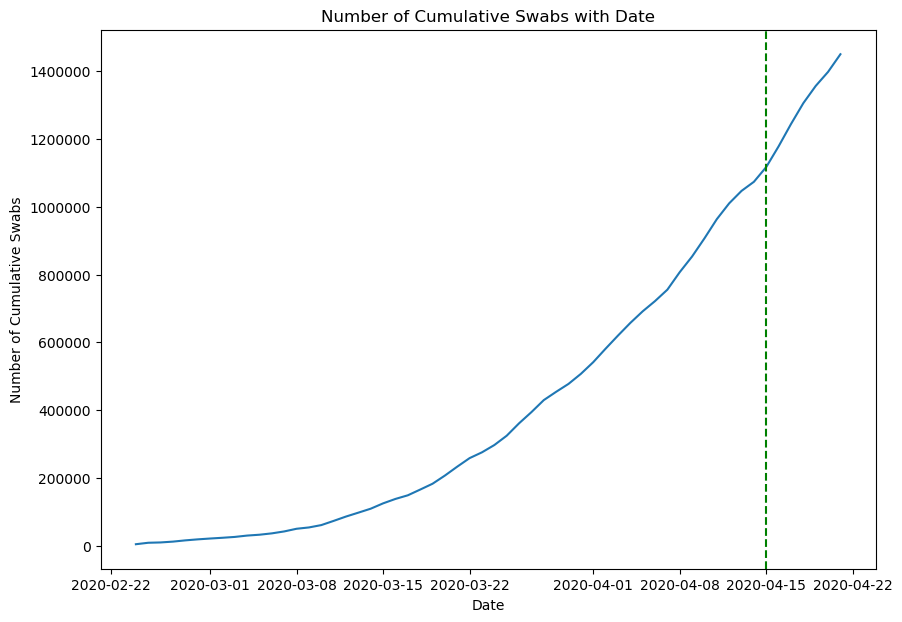

In [24]:
plot_wdate(column = "swabs", label = "Cumulative Swabs")

**1. Perform a train-test split, with observations from the last week corresponding to the test set;**

In [25]:
# Perform a train-test split, with observations from the last week corresponding to the test set;
sep_idx = data.index.searchsorted(pd.to_datetime("2020-04-15"))
data_early = data.iloc[:sep_idx]
data_late = data.iloc[sep_idx:]
#data_early
#data_late

In [26]:
def dates_to_idx(timelist):
    
    """Given the date time array converted to scalar values
    by substracting the first date and dividing the week"""
    
    reference_time = pd.to_datetime("2020-02-24")
    t = (timelist - reference_time) / np.timedelta64(1, 'W')
    return np.asarray(t)

def normalize(column):
    
    """Normalizing the given column by substracting the first element
    and dividing it to standard deviation"""
    
    first = np.mean(column)
    std = np.std(column)
    return (column-first)/ std

In [27]:
data['Rescaled_Date'] = dates_to_idx(data.index)
data['Daily_swabs_normalized'] = normalize(daily_swabs)
data['Daily_deaths_normalized'] = normalize(daily_deaths)
data['Deaths_normalized'] = normalize(data['deaths'])
data['Swabs_normalized'] = normalize(data['swabs'])

data.head()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,Rescaled_Date,Daily_swabs_normalized,Daily_deaths_normalized,Deaths_normalized,Swabs_normalized
date,,,,,,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94,0.000000,-1.124108,-1.459049,-1.047312,-1.010717
2020-02-25,10,8623,35,114,93,322,1,162,0.142857,-1.125467,-1.473012,-1.046962,-1.000955
2020-02-26,12,9587,36,128,78,400,3,221,0.285714,-1.306761,-1.476503,-1.046729,-0.998767
2020-02-27,17,12014,56,248,250,650,45,284,0.428571,-1.227231,-1.466031,-1.046146,-0.993256
2020-02-28,21,15695,64,345,238,888,46,412,0.571429,-1.159062,-1.469521,-1.045679,-0.984898


In [28]:
data.tail()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,Rescaled_Date,Daily_swabs_normalized,Daily_deaths_normalized,Deaths_normalized,Swabs_normalized
date,,,,,,,,,,,,,
2020-04-17,22745,1244108,2812,25786,3493,172434,42727,78364,7.571429,2.212623,0.523746,1.604705,1.804288
2020-04-18,23227,1305833,2733,25007,3491,175925,44927,80031,7.714286,1.996266,0.199098,1.660922,1.944438
2020-04-19,23660,1356541,2635,25033,3047,178972,47055,80589,7.857143,1.397372,0.028047,1.711425,2.059574
2020-04-20,24114,1398024,2573,24906,2256,181228,48877,80758,8.000000,0.895891,0.101355,1.764376,2.153763
2020-04-21,24648,1450150,2471,24134,2729,183957,51600,81104,8.142857,1.474455,0.380621,1.826659,2.272119


In [29]:
def train_test_split(X, y):
    """Given column name train test split performed with observations 
    from the last week target variable depend on given column whether 
    train set is Rescaled_Date. It returns trains and tests sets as well as X
    y."""
    
    X = data[X].values[:,None] 
    y = data[y].values
    X_train = X[:len(data_early)]
    y_train = y[:len(data_early)]
    X_test = X[len(data_early):]
    y_test = y[len(data_early):]
    
    return X, y, X_train, X_test, y_train, y_test

In [30]:
# Train test split for daily number of daily_deaths
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="Daily_deaths_normalized")

**2. Build a suitable combination of kernels choosing from the ones shown in `notebook_05`;**

Below groups of kernels are defined. Some of them are more complex. They will be all used for predicting desired target variable and best one will be presented with plots. If complex and simple kernels gave similar results, simple one preferred.

In [31]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic,WhiteKernel
from sklearn.gaussian_process.kernels import  DotProduct, Matern, ConstantKernel

In [56]:
kernel1 = 10**2 * RBF(length_scale=20) # long term trend
kernel2 = 50 * DotProduct(sigma_0=0.5) # linear regression
kernel3 = 50**2 * Matern(length_scale=50,nu=2.5)
kernel4 = 20**2 * ExpSineSquared(length_scale=20)

In [88]:
kernel5 = 50*kernel2 * 20*kernel1 + WhiteKernel(noise_level=0.1)
kernel6 = kernel2 * kernel2 + WhiteKernel(noise_level=0.1)
kernel7 = 30*kernel2 + 70*kernel3
kernel8 = 100*(30**2 *kernel1) + 30* kernel3
kernel9 = (kernel2 * kernel2) * kernel3 * kernel4 + WhiteKernel(noise_level=0.1)

**Consider first the column corresponding to the (cumulative) number of deaths.**

In [58]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [59]:
def plot_predictions(gp, X:np.array, y:np.array, include_observed=True):

    pred_y, pred_std = gp.predict(X, return_std=True)
    plt.figure(figsize=(10, 7))
    if include_observed:
        plt.plot(X, y, 'ok', alpha = 0.3, label = "Observed",color = "r")
    plt.plot(X, pred_y, label = "Predicted")
    plt.fill_between(X[:,0],
                    pred_y + pred_std,
                    pred_y - pred_std,
                    color = "b", alpha = 0.2)

    if np.allclose(X[:, 0], X):
        plt.axvline(dates_to_idx(pd.to_datetime("2020-04-15")), linestyle='--', color='g')
    else:
        plt.axvline(dates_to_idx(pd.to_datetime("2020-04-15")), linestyle='--', color='g')
    plt.legend(loc='upper left')

In [60]:
def fit_plot_givekernel(X, y, plot_title,kernel,alpha):
    
    """This function performs trains test split, fits the data to GP,
    plots the results and gives the optimized kernel and parameters"""
    
    X, y, X_train, X_test, y_train, y_test = train_test_split(X=X,y=y)

    gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha,
                                   normalize_y=True,
                                   n_restarts_optimizer=3)
    gp.fit(X_train, y_train)
    plot_predictions(gp,X,y)
    plt.title(plot_title)
    
    print("Optimized Kernel:\n {}".format(gp.kernel_,))
    

Optimized Kernel:
 0.999**2 * ExpSineSquared(length_scale=0.0223, periodicity=0.0476)


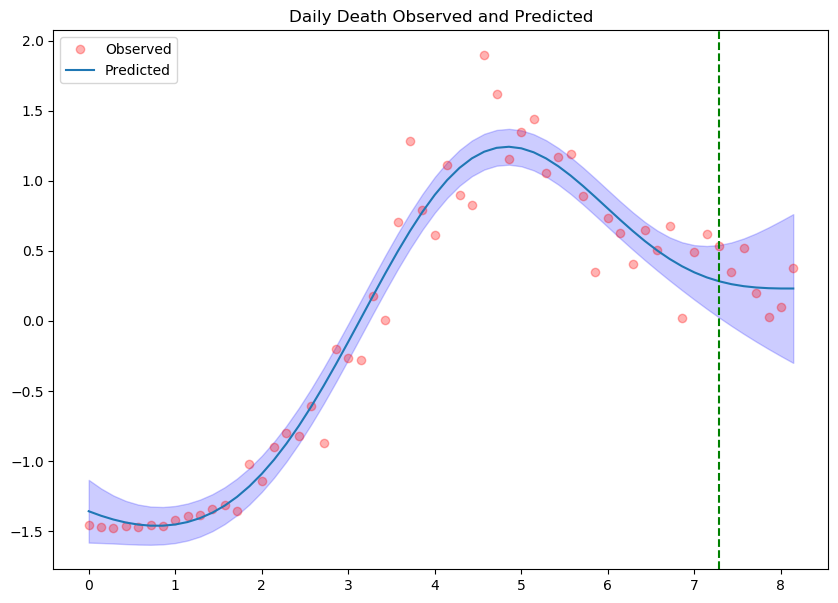

In [61]:
fit_plot_givekernel(X="Rescaled_Date",y="Daily_deaths_normalized",kernel=kernel4,alpha=0.2,
                        plot_title="Daily Death Observed and Predicted")

Optimized Kernel:
 0.401**2 * 0.518**2 * DotProduct(sigma_0=0.00205) + 0.4**2 * 2.39**2 * Matern(length_scale=5.01, nu=2.5)


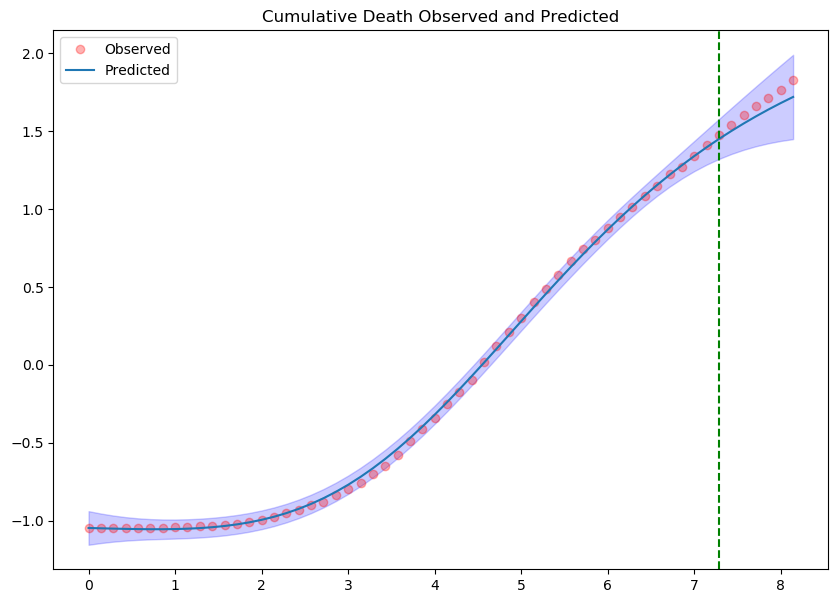

In [115]:
fit_plot_givekernel(X="Rescaled_Date",y="Deaths_normalized",kernel=kernel7,alpha=0.05,
                        plot_title="Cumulative Death Observed and Predicted" )

**3. Fit a `GaussianProcessRegressor` to predict the daily number of swabs, plot future predictions and compare them to real test data;**

Optimized Kernel:
 6.61**2 * DotProduct(sigma_0=2.4) * 0.0938**2 * DotProduct(sigma_0=268) * 0.205**2 * Matern(length_scale=7.53, nu=2.5) * 0.00842**2 * ExpSineSquared(length_scale=5.6, periodicity=0.0455) + WhiteKernel(noise_level=1e-05)


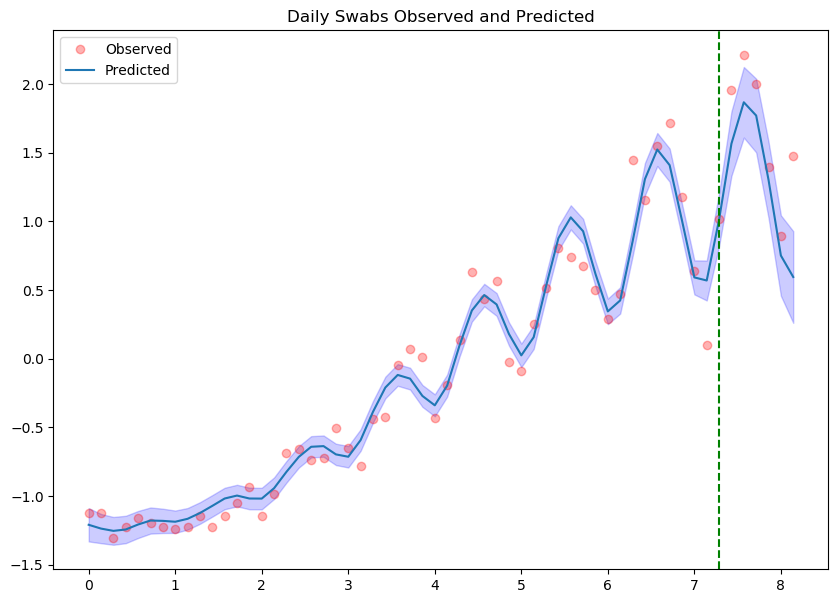

In [89]:
# maybe need to make it bit upper for rgiht side
fit_plot_givekernel(X="Rescaled_Date",y="Daily_swabs_normalized",kernel=kernel9,alpha=0.05,
                        plot_title="Daily Swabs Observed and Predicted")

There is interesting situaiton here, when I tried different kernels most of them gave really good estimation for the data apart from last week. There might be overfitting situation because it performs really good for training set but not for test set. I leave one of them as an example.

Optimized Kernel:
 0.743**2 * RBF(length_scale=0.416)


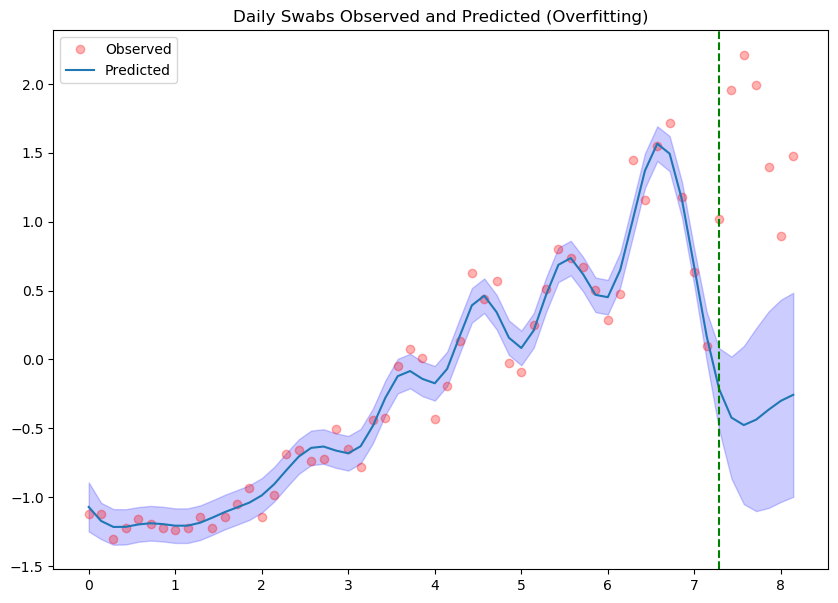

In [91]:
# maybe need to make it bit upper for rgiht side
fit_plot_givekernel(X="Rescaled_Date",y="Daily_swabs_normalized",kernel=kernel1,alpha=0.05,
                        plot_title="Daily Swabs Observed and Predicted (Overfitting)")

Optimized Kernel:
 3.76**2 * DotProduct(sigma_0=3.39) * 0.0136**2 * DotProduct(sigma_0=3.39) + WhiteKernel(noise_level=1e-05)


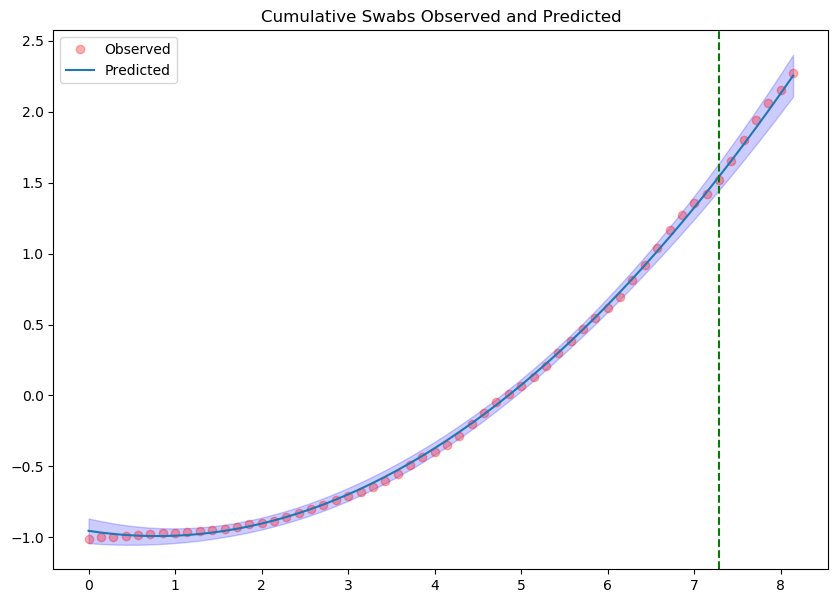

In [102]:
#same problem see how to increase right side
fit_plot_givekernel(X="Rescaled_Date",y="Swabs_normalized",kernel=kernel6,alpha=0.05,
                        plot_title="Cumulative Swabs Observed and Predicted")

**4. Repeat points 1-3 on the daily number of swabs, which can be computed from the cumulative number provided in the dataset.**

**You are welcome to try out and fit other data streams in the dataset.**


Optimized Kernel:
 0.934**2 * Matern(length_scale=0.674, nu=2.5)


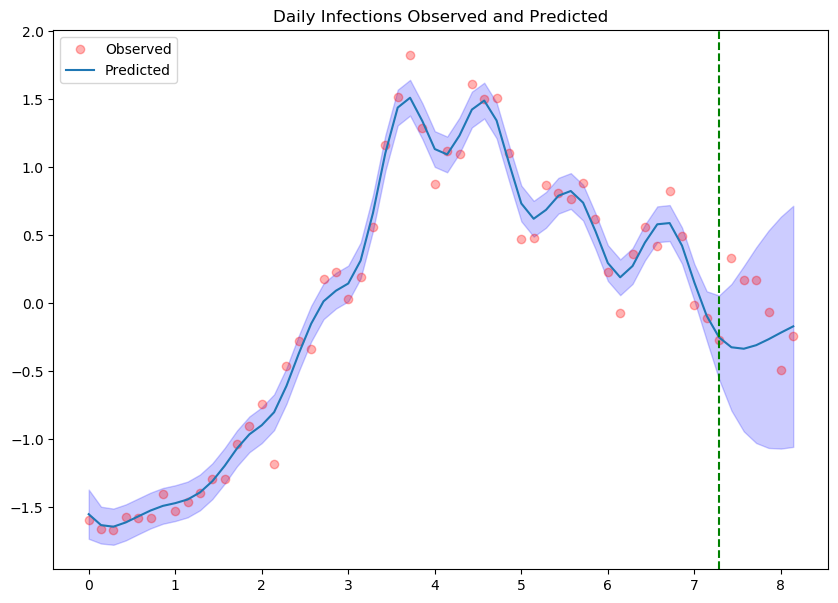

In [117]:
data["infection_normalized"] = normalize(data["new_infections"])
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="infection_normalized")

fit_plot_givekernel(X="Rescaled_Date",y="infection_normalized",kernel=kernel3,alpha=0.05,
                        plot_title="Daily Infections Observed and Predicted")